<a href="https://colab.research.google.com/github/DennisFelixuff/Financas/blob/Finan%C3%A7as/A%C3%A7%C3%A3o_vs_BDR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/DennisFelixuff/Financas/blob/Finan%C3%A7as/logo_df_quant.jpeg?raw=true" width="280" align="left"/>

# **Comparação Ação vs. BDR - automatização de geração de relatório PDF**
### **Por que investir em BDRs?**

Neste estudo de caso, utilizaremos o Python para automatizar a geração de um relatório que vai nos ajudar na tomada de decisão de investimento.

# 0. Importação das bibliotecas

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# 1. Captura dos dados

In [2]:
apple = yf.download(['AAPL34.SA', 'AAPL'], start = '2022-01-01')['Adj Close']

[*********************100%***********************]  2 of 2 completed


In [3]:
apple.head()

Ticker,AAPL,AAPL34.SA
Date,,
2022-01-03 00:00:00+00:00,179.273590,51.047707
2022-01-04 00:00:00+00:00,176.998337,50.682724
2022-01-05 00:00:00+00:00,172.290192,49.380642
2022-01-06 00:00:00+00:00,169.414124,48.093349
2022-01-07 00:00:00+00:00,169.581573,48.182129


In [4]:
apple = apple.ffill(axis = 0)

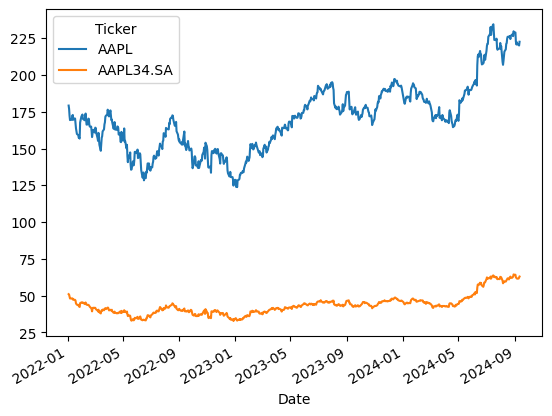

In [5]:
apple.plot();

In [6]:
apple_normalizado = apple/apple.iloc[0]

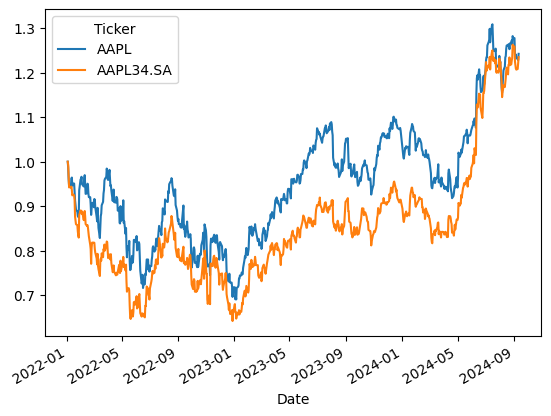

In [7]:
apple_normalizado.plot();

# 2. Criando função para análise de várias janelas de tempo

In [8]:
def compara_ativos(inicio):
  dados = yf.download(['AAPL34.SA', 'AAPL'], start = inicio, progress = False)['Adj Close']
  dados = dados.dropna()
  dados = dados/dados.iloc[0]
  dados.plot();

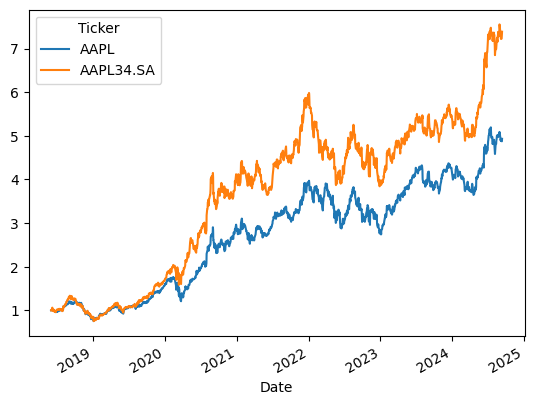

In [9]:
compara_ativos('2018-06-01')

# 3. Criando loop para geração do relatório

In [10]:
datas = ['2018-01-01', '2019-01-01','2020-01-01','2021-01-01','2022-01-01','2023-01-01']

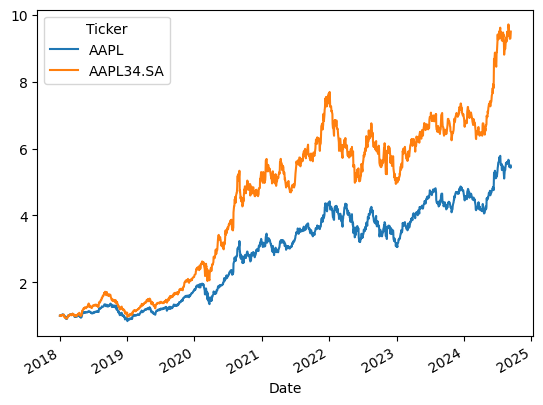

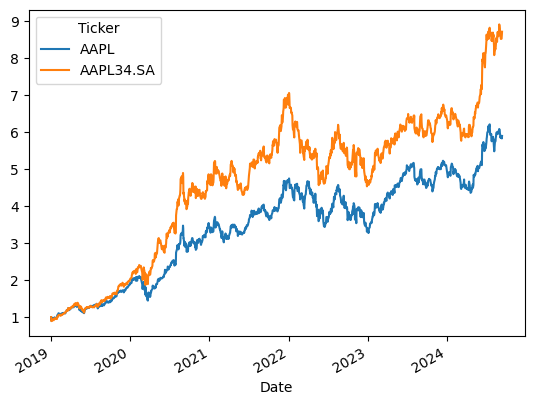

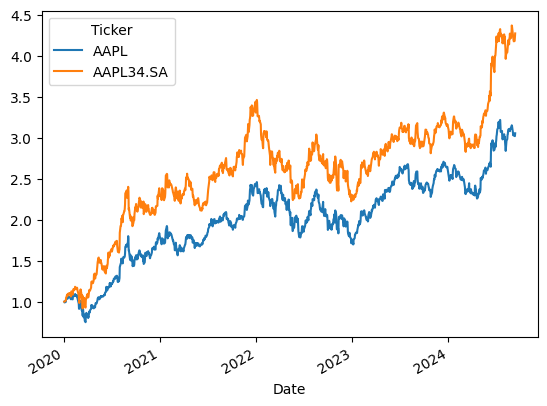

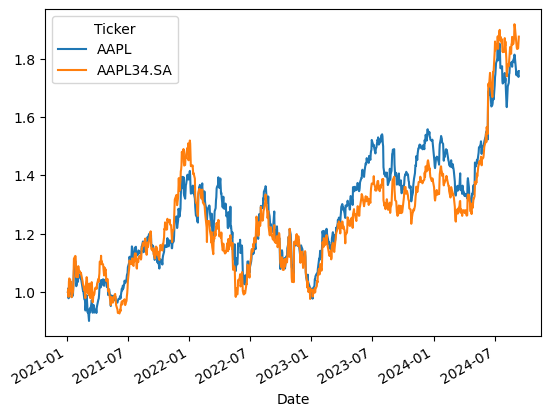

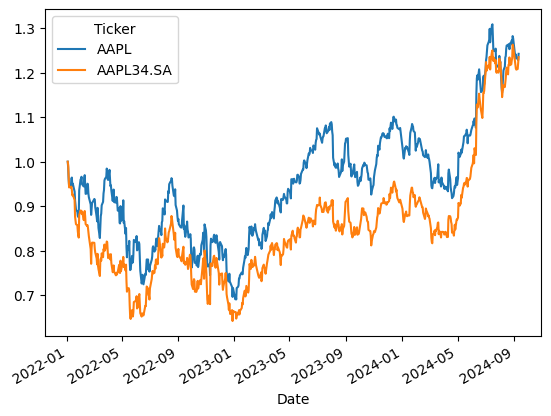

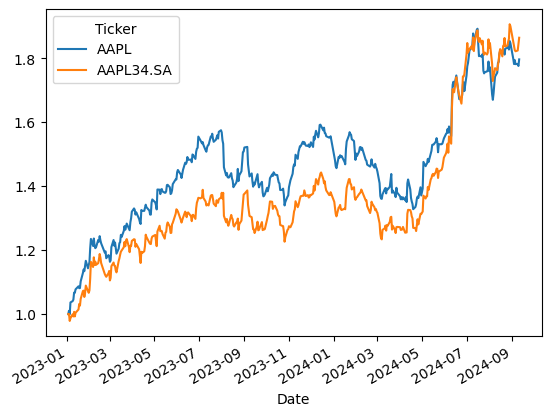

In [11]:
relatorio = PdfPages('relatorio_acao_vs_bdr.pdf')

for data in datas:
  relatorio.savefig(compara_ativos(data))
relatorio.close()

# 4. Mensurar o impacto do câmbio

In [12]:
dados = yf.download(['AAPL34.SA', 'AAPL', 'USDBRL=X'], start = '2017-01-03')['Adj Close']

[*********************100%***********************]  3 of 3 completed


In [13]:
dados.head()

Ticker,AAPL,AAPL34.SA,USDBRL=X
Date,,,
2017-01-03 00:00:00+00:00,26.921549,4.338758,3.2840
2017-01-04 00:00:00+00:00,26.891411,4.323677,3.2635
2017-01-05 00:00:00+00:00,27.028164,4.348039,3.2141
2017-01-06 00:00:00+00:00,27.329485,4.372400,3.1977
2017-01-09 00:00:00+00:00,27.579802,4.451287,3.2222


In [14]:
dados = dados.ffill(axis = 0)

Criar nova coluna para encontrar o preço de AAPL em reais

In [15]:
dados['Apple_reais'] = dados['AAPL'] * dados['USDBRL=X']

In [16]:
dados.head()

Ticker,AAPL,AAPL34.SA,USDBRL=X,Apple_reais
Date,,,,
2017-01-03 00:00:00+00:00,26.921549,4.338758,3.2840,88.410364
2017-01-04 00:00:00+00:00,26.891411,4.323677,3.2635,87.760119
2017-01-05 00:00:00+00:00,27.028164,4.348039,3.2141,86.871218
2017-01-06 00:00:00+00:00,27.329485,4.372400,3.1977,87.391495
2017-01-09 00:00:00+00:00,27.579802,4.451287,3.2222,88.867634


Normalizar todo o dataframe

In [17]:
dados_normalizados = dados/dados.iloc[0]

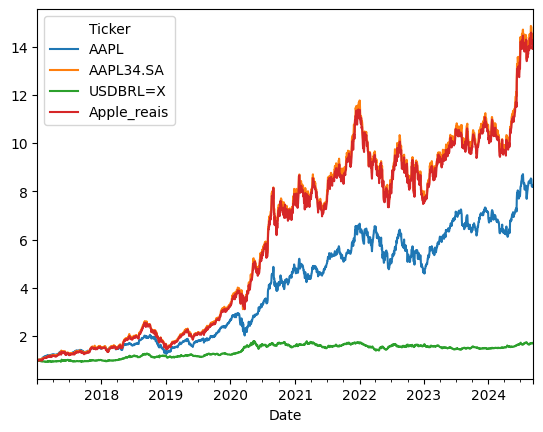

In [18]:
dados_normalizados.plot();

In [19]:
spread = (dados_normalizados['Apple_reais']/dados_normalizados['AAPL34.SA'])

In [20]:
import plotly.express as px

In [21]:
fig = px.line(x=spread.index, y=spread)

fig.add_hline(y=spread.mean(), line_width=5, line_color="green")
fig.add_hline(y=(spread.mean()-spread.std()), line_width=3,
              line_dash="dash", line_color="orange")
fig.add_hline(y=(spread.mean()+spread.std()), line_width=3,
              line_dash="dash", line_color="orange")
fig.add_hline(y=(spread.mean()-2*spread.std()), line_width=5,
              line_dash="dash", line_color="red")
fig.add_hline(y=(spread.mean()+2*spread.std()), line_width=5,
              line_dash="dash", line_color="red")

fig.update_layout(xaxis_rangeslider_visible=False,
                  title_text='Razão entre preço AAPL em R$ e AAPL34 (entre 2018 e 2023)'

,template = 'simple_white',width=1100,height=500)

fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()
